### This notebook is to practice the implementation (simulation) of different probability distrbution:

In this notebook you will learn how to simulate experiments and generate random variables using numpy
1. Binomial random number generator
2. Poisson random number generator 
3. Uniform random number generator
4. Exponential random number generator
5. Normal random number generator

You will learn how to compute the experctation and variance, covariance and correlation
You will earn how to plot histogram and the probability distributions using matplotlib.pyplot and seaborn

Your personal work: explore and re-code the examples below in scipy.stats module {https://docs.scipy.org/doc/scipy/reference/stats.html}

Additional: Theory explanations with code examples can also be found here (Note: expect different syntax using (scipy.stats)): 
https://docs.scipy.org/doc/scipy/reference/stats.html
https://bigdata-madesimple.com/how-to-implement-these-5-powerful-probability-distributions-in-python/
https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2
https://web.stanford.edu/class/cs109/handouts/python.html
https://towardsdatascience.com/deep-learning-book-series-3-4-and-3-5-marginal-and-conditional-probability-8c6239e453b8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Self study: Explore numpy.random.choice method
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

## random.binomial(n, p, size=None)

Drawing samples from a binomial distribution: 
https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html?highlight=probability

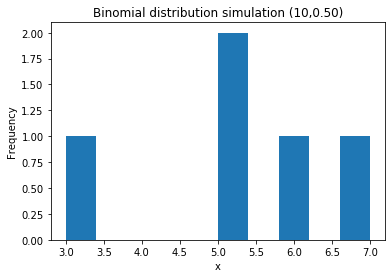

In [2]:
# Result of simulating flipping a coin 10 times, tested 5 times.
# This is equivalent to having 5 i.i.d. random variables, each defined on 10 coin tosses experiments

n = 10  # number of trials
p = .5  # probability of each trial (success)
s = np.random.binomial(n, p, 5) # The number of successes over the n trials.

plt.hist(s)  # The hist() function will read the array and produce a histogram of the random variables values

plt.title("Binomial distribution simulation (%d,%.2f)" % (n, p))
plt.xlabel("x")
plt.ylabel ("Frequency")
plt.show()


# NOTE: Run it multiple times and observe the change in the plot

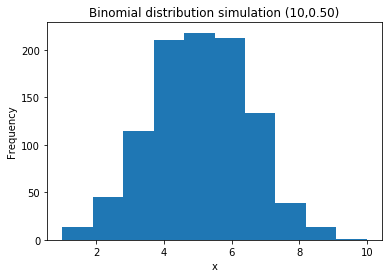

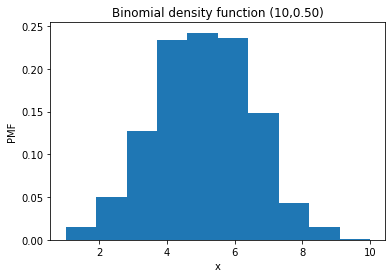

In [3]:
# Note: if you simulate a sequence of several random i.i.d variables and check that the higher the number of the variables, the more the mean of subsets behave like a Gaussian random variabl
# Result of simulating flipping a coin 10 times, tested 1000 times.
# This is equivalent to having 1000 i.i.d. random variables, each defined on 10 coin tosses experiments

n = 10  # number of trials
p = .5  # probability of each trial (success)
s = np.random.binomial(n, p, 1000) # The number of successes over the n trials.

plt.hist(s)  # The hist() function will read the array and produce a histogram of the random variables values

plt.title("Binomial distribution simulation (%d,%.2f)" % (n, p))
plt.xlabel("x")
plt.ylabel ("Frequency")
plt.show()

# NOTE:
# For hist(), if the attribute density(default: False) is True, it draws and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
# Check out the documentation here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

# Check the values on the y-axis
plt.hist(s,density=True)  

plt.title("Binomial density function (%d,%.2f)" % (n, p))
plt.xlabel("x")
plt.ylabel ("PMF")
plt.show()

# NOTE: Run it multiple times and observe the change in the plot

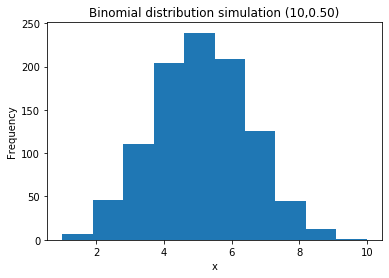

In [4]:
# Another implementation using numpy.random.Generator.binomial ==> LATEST UPDATE

rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
s2 = rng.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.
plt.hist(s2)  # The hist() function will read the array and produce a histogram of the random variables values

plt.title("Binomial distribution simulation (%d,%.2f)" % (n, p))
plt.xlabel("x")
plt.ylabel ("Frequency")
plt.show()

In [5]:
Bi_Expected = np.mean(s2) # E(X) = n.p for binomial random variables
print(Bi_Expected)

5.063


In [6]:
Bi_Var = np.var(s2)  # Var(X) = np(1 – p) for binomial random variables supposed to be = 10*0.5*0.5 = 2.5
print(Bi_Var)

2.517031


In [7]:
Bi_std = np.std(s2)  # std(X) = sqrt (Var(X))
print(Bi_std)
print(np.sqrt(Bi_Var))

1.586515363934431
1.586515363934431


In [8]:
rng = np.random.default_rng()
n, p = 10, .9  # number of trials, probability of each trial
s3 = rng.binomial(n, p, 1000)

print("Correlation between two r.v following binomial distribution")
C1 = np.cov(s2, s3)
print (C1)
C2 = np.corrcoef(s2,s3)
print (C2)


s5 = np.random.randint(6, size=1000)
C1 = np.cov(s2, s5)
print (C1)
C2 = np.corrcoef(s2,s5)
print (C2)


# NOTE: Run it multiple times and observe the change in the covariance and correlation matrices (signs and values of diagonal/off-diagonal elements)

Correlation between two r.v following binomial distribution
[[2.51955055 0.06742142]
 [0.06742142 0.88512112]]
[[1.         0.04514764]
 [0.04514764 1.        ]]
[[ 2.51955055 -0.0125045 ]
 [-0.0125045   2.91465866]]
[[ 1.         -0.00461436]
 [-0.00461436  1.        ]]


## random.RandomState.poisson(lam=1.0, size=None)

Drawing samples from a Poisson distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.poisson.html?highlight=probability

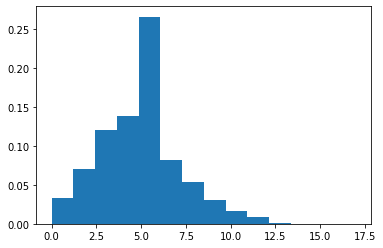

In [9]:
s = np.random.poisson(5, 10000)  # generating 10,000 values for a poisson random variable with rate parameter (lamda) = 5
#count, bins, ignored = plt.hist(s, 14, density=True)
plt.hist(s, 14, density=True)
plt.show()

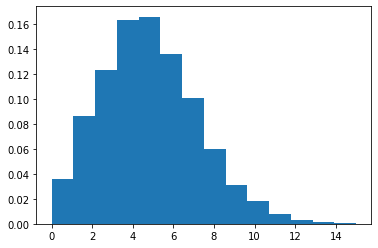

In [10]:
# Another implementation using numpy.random.Generator.poisson ==> LATEST UPDATE

rng = np.random.default_rng()
s2 = rng.poisson(5, 10000)

plt.hist(s2, 14, density=True)
plt.show()

## random.RandomState.uniform(low=0.0, high=1.0, size=None)

Drawing samples from a uniform distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.uniform.html?highlight=probability

See also: randint, random_integers, random_sample, random, rand

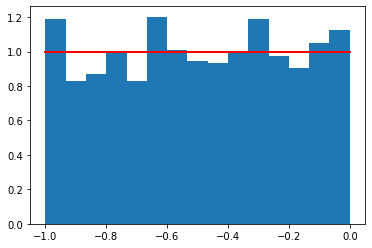

In [11]:
s = np.random.uniform(-1,0,1000)  # generating 1000 values for a uniform random variable between -1 and 0
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

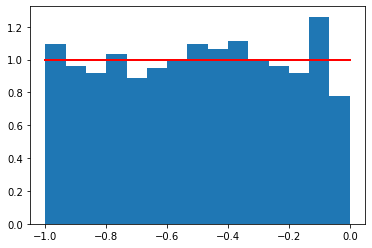

In [12]:
# Another implementation using numpy.random.Generator.uniform ==> LATEST UPDATE

rng = np.random.default_rng()  
s2 = rng.uniform(-1,0,1000)
count, bins, ignored = plt.hist(s2, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

## random.RandomState.exponential(scale=1.0, size=None)

Drawing samples from a exponential distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.exponential.html?highlight=probability
NOTE: The scale parameter, beta = 1/lambda (Must be non-negative) and lambda is the rate parameter


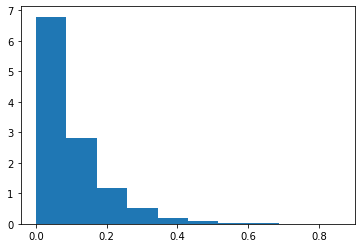

In [13]:
s = np.random.exponential(0.1, 10000)  # generating 1000 values for an exponential random variable with The scale parameter = 1/lambda. Let Lambda = 10
plt.hist(s, density = True)
plt.show()

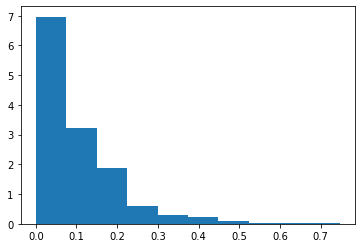

In [14]:
# Another implementation using numpy.random.Generator.exponential ==> LATEST UPDATE

rng = np.random.default_rng()  
s2 = rng.exponential(0.1, 1000)
plt.hist(s2, density=True)
plt.show()

## Plotting using seaborn vs matplotlib
https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [15]:
import seaborn as sns
sns.set()

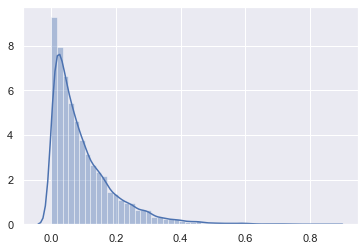

In [16]:
sns.distplot(s)

## random.RandomState.normal(loc=0.0, scale=1.0, size=None)

Drawing samples from a normal distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.normal.html?highlight=probability

(array([0.1737825 , 0.81677775, 1.181721  , 2.850033  , 3.7884585 ,
        3.753702  , 2.65887225, 1.5640425 , 0.39969975, 0.19116075]),
 array([-0.28316742, -0.22562422, -0.16808103, -0.11053783, -0.05299464,
         0.00454855,  0.06209175,  0.11963494,  0.17717813,  0.23472133,
         0.29226452]),
 <a list of 10 Patch objects>)

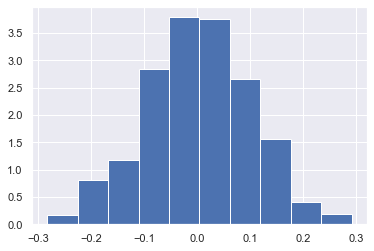

In [17]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)  # generating 1000 values for a normal random variable with standard values
plt.hist(s, density=True)

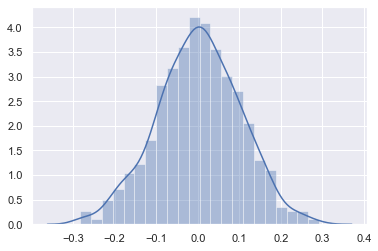

In [18]:
# Another implementation using numpy.random.Generator.normal ==> LATEST UPDATE

rng = np.random.default_rng()  
s2 = rng.normal(mu, sigma, 1000)
#plt.hist(s2, density=True)
sns.distplot(s)